# Data Preparation

Below are examples of the Titanic dataset, containing passenger records on board the titanic, and the OKCupid dataset, containing records authorized by OKCupid for use in Machine Learning research.

Your assignment is to combine the results of the Titanic and OKCupid datasets. You should replace each passenger aboard the titanic and their relevant data with a matching individual from the OKCupid dataset.

There should be no duplicates in the remaining dataset, with no NaNs, nulls, or missing information. More specifics at the bottom.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

# The first few records
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [2]:
# 891 passengers with 15 data entries per
print(titanic.shape)

(891, 15)


         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


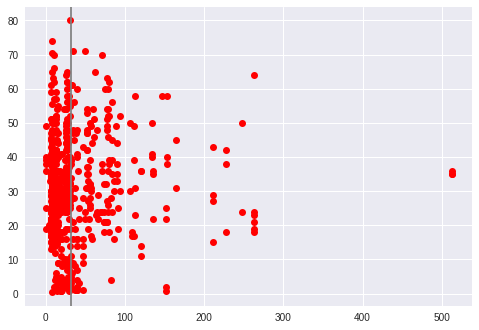

In [3]:
# describe produces interesting statistics about a pandas DataFrame or Series
print(titanic.describe(include=[np.number]))

import matplotlib.pyplot as plt
plt.plot(titanic['fare'],titanic['age'],'or')
plt.axvline(titanic['fare'].mean(),color="grey")

### OKCupid

The OKCupid dataset is 150MB and needs to be downloaded to your Colab session before you can load it. It loads using the same command as the titanic.

In [4]:
!wget https://www.dropbox.com/s/kurta6eazegc3su/JSE_OkCupid_profiles.csv?raw=1 -O /tmp/JSE_OkCupid_profiles.csv

--2018-04-10 22:18:30--  https://www.dropbox.com/s/kurta6eazegc3su/JSE_OkCupid_profiles.csv?raw=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/content_link/JPV4nHJiyRtxhJvjuO6dszhuBPVXcDaA4K5cCAeOVQNEoHhhqovrxDkZs2ztOGqs/file [following]
--2018-04-10 22:18:31--  https://dl.dropboxusercontent.com/content_link/JPV4nHJiyRtxhJvjuO6dszhuBPVXcDaA4K5cCAeOVQNEoHhhqovrxDkZs2ztOGqs/file
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.7.6, 2620:100:601a:6::a27d:706
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.7.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 151614805 (145M) [text/csv]
Saving to: ‘/tmp/JSE_OkCupid_profiles.csv’

/tmp/JSE_OkCupid_pr 100%[===================>] 144.59M  46.4MB/s    in 3.1

In [5]:
okcupid = pd.read_csv('/tmp/JSE_OkCupid_profiles.csv')

# almost 60000 individuals with 31 columns each
print(okcupid.shape)

# There are many more columns in OKCupid than titanic
print(okcupid.columns)

# The set of body_types 
print(okcupid.body_type.unique())

(59946, 31)
Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')
['a little extra' 'average' 'thin' 'athletic' 'fit' nan 'skinny' 'curvy'
 'full figured' 'jacked' 'rather not say' 'used up' 'overweight']


In [6]:
# The number of unique entries for each column
for column in okcupid.columns:
    print(column, okcupid[column].unique().size)

age 54
body_type 13
diet 19
drinks 7
drugs 4
education 33
essay0 54351
essay1 51517
essay2 48636
essay3 43534
essay4 49261
essay5 48964
essay6 43604
essay7 45555
essay8 39325
essay9 45444
ethnicity 218
height 61
income 13
job 22
last_online 30123
location 199
offspring 16
orientation 3
pets 16
religion 46
sex 2
sign 49
smokes 6
speaks 7648
status 5


In [7]:
print(okcupid[1:10].isnull())

     age  body_type   diet  drinks  drugs  education  essay0  essay1  essay2  \
1  False      False  False   False  False      False   False   False   False   
2  False      False  False   False   True      False   False   False   False   
3  False      False  False   False   True      False   False   False   False   
4  False      False   True   False  False      False   False   False   False   
5  False      False  False   False   True      False   False   False   False   
6  False      False  False   False  False      False   False   False   False   
7  False      False  False   False  False      False    True   False   False   
8  False       True  False   False   True      False    True   False    True   
9  False      False  False   False  False      False   False   False   False   

   essay3   ...    location  offspring  orientation   pets  religion    sex  \
1    True   ...       False      False        False  False     False  False   
2   False   ...       False       True   

### Duplicates

There are no duplicates in OKCupid and 107 titanic duplicates.

In [8]:
print(okcupid.duplicated().sum())
print(titanic.duplicated().sum())

0
107


## Instructions

Titanic contains 891 records with 107 duplicates. The final table should contain 784 records. The titanic dataset is also full of  redudant columns: `survived : alive`, `sex : who : adult_male`, which can be identified if they are truly redundant and can be removed if so.

The OKCupid dataset has ~60k records. There are 31 columns that match many of the features (importantly age/sex) in the titanic set.

Update each row of the titanic dataset to contain OKCupid data that matches in demographic information. Select a few columns from the OKCUpid dataset to transfer to the titanic dataset as well to increase the personality of each entry. Do not move the extremely long written records in the OKCupid dataset as part of this process. Those records will be useful later for NLP and text mining.

_Document and justify your decisions!_

### Suggested search terms

python pandas replace columns

python pandas concatenate columns

python pandas concatenate rows

python pandas remove duplicates

python pandas merge and join records

## Remove duplicates

In [9]:
titanic = titanic.drop_duplicates()
print(titanic.shape)
titanic.head()

(784, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Benchmark

The titanic dataset is very popular for beginning Data Science training.

Your final dataset should perfectly match these two obvious and famous benchmarks of the titanic data, with other new, interesting analysis available from your combinations:

In [10]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.740614
male,0.215886


In [11]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.967742,0.917808,0.472441
male,0.371901,0.184783,0.158273


## Drop redundant columns

By inspection, redundant columns include class and pclass, alive and survived, embark_town and embarked, as well as adult_male and who which rely on sex and age.

In [12]:
titanic_df = titanic.drop(['pclass', 'alive', 'adult_male', 'who', 'embarked'], axis=1)

titanic_df.head()

,survived,sex,age,sibsp,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,NaN,Southampton,False
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,False
2,1,female,26.0,0,0,7.9250,Third,NaN,Southampton,True
3,1,female,35.0,1,0,53.1000,First,C,Southampton,False
4,0,male,35.0,0,0,8.0500,Third,NaN,Southampton,True


## Fill in missing values

In [13]:
titanic_df.isnull().any()

survived       False
sex            False
age             True
sibsp          False
parch          False
fare           False
class          False
deck            True
embark_town     True
alone          False
dtype: bool

The age, deck, and embark_town columns contain missing values. I will fill age with the mean age, and deck and embark_town with the most common entries in those respective columns. As this is altering the data in a way that may not reflect reality, I will save the result in a new dataframe.

In [0]:
def fillna_mixed_columns(dataframe):
    """Fills missing dataframe values with the median value for numeric columns, ignoring non-numeric columns
    https://stackoverflow.com/questions/25239958/impute-categorical-missing-values-in-scikit-learn
    
    Args:
        dataframe (pandas.core.frame.DataFrame): dataframe with observations as rows and features as columns
        
    Returns:
        dataframe with missing values in numeric columns filled with the columns' mean values
        
    """
    fill = pd.Series([dataframe[c].value_counts().index[0] 
                      if dataframe[c].dtype != np.dtype(np.int64) or dataframe[c].dtype != np.dtype(np.float64) 
                      else dataframe[c].mean() for c in dataframe], 
                     index=dataframe.columns)
    
    return dataframe.fillna(fill)

In [15]:
# fill null values

titanic_filled = fillna_mixed_columns(titanic_df)
titanic_filled.isnull().any().any()

False

In [16]:
# use integer dtype for age

titanic_filled['age'] = titanic_filled['age'].astype(int)
titanic_filled.head()

,survived,sex,age,sibsp,parch,fare,class,deck,embark_town,alone
0,0,male,22,1,0,7.2500,Third,C,Southampton,False
1,1,female,38,1,0,71.2833,First,C,Cherbourg,False
2,1,female,26,0,0,7.9250,Third,C,Southampton,True
3,1,female,35,1,0,53.1000,First,C,Southampton,False
4,0,male,35,0,0,8.0500,Third,C,Southampton,True


## Merging Titanic and OKCupid data

In order to produce an augmented Titanic dataset containing plausible personas, I will match passengers with profiles using age, sex, and class, with the latter matching to OKCupid income ranges. The details from OKCupid I will consider are body type, diet, drinks, drugs, smokes, height, education, income, job, orientation, and sign.

The result of this exercise is not expected to accurately portray the demographics of the actual Titanic passengers. However, I do expect to some extent that it will give perspective on how likely a modern person would be to survive a present day Titanic crash.

In [0]:
# removing underage passengers

titanic_adults = titanic_filled[titanic_filled['age'] >= 18]

In [18]:
# dropping unneeded columns

okcupid_df = okcupid.drop(['essay0', 'essay1', 'essay2', 'essay3', 'essay4',
                          'essay5', 'essay6', 'essay7', 'essay8', 'essay9',
                          'last_online', 'location', 'speaks', 'status', 
                          'pets', 'religion'], axis=1)

okcupid_df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,sex,sign,smokes
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,"doesn&rsquo;t have kids, but might want them",straight,m,gemini,sometimes
1,35,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,"doesn&rsquo;t have kids, but might want them",straight,m,cancer,no
2,38,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,NaN,straight,m,pisces but it doesn&rsquo;t matter,no
3,23,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,doesn&rsquo;t want kids,straight,m,pisces,no
4,29,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,NaN,straight,m,aquarius,no


### Relating passenger class with OKCupid income

Because the large amount of blank entries in the `income` column being represented by `-1`, the summary statistics will be skewed. I will first replace them with NaNs, so they do not affect the calculation of the mean. 

I will use the fares associated with each class of Titanic ticket as an estimate for the quantile range of incomes that correspond to each class.

In [19]:
passengers = titanic_adults.shape[0]

second_class_fare = titanic_adults[titanic_adults['class']=='First']['fare'].mean()
third_class_fare = titanic_adults[titanic_adults['class']=='Third']['fare'].mean()

upper_quantile = titanic_adults[titanic_adults['fare']<second_class_fare].shape[0] / passengers
lower_quantile = titanic_adults[titanic_adults['fare']<third_class_fare].shape[0] / passengers

print(upper_quantile)
print(lower_quantile)

0.9065281899109793
0.4035608308605341


Given these results, I will assume that OKCupid users with income in the lower 40th percentile will correspond to the Third Class, while those with income in the 90th percentile or higher will correspond to the First Class, with all those in between being Second Class passengers

In [0]:
okcupid_df['income'] = okcupid_df['income'].replace(-1, np.nan)

In [21]:
lower_value = okcupid_df['income'].quantile(lower_quantile)
upper_value = okcupid_df['income'].quantile(upper_quantile)

print([lower_value, upper_value])

[40000.0, 150000.0]


In [22]:
okcupid_df['income'] = okcupid_df['income'].fillna(okcupid_df['income'].median())
okcupid_df['class'] = pd.Series(['Third' if x<=lower_value else 'First' if x>=upper_value else 'Second' for x in okcupid_df['income']])

okcupid_df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,sex,sign,smokes,class
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,50000.0,transportation,"doesn&rsquo;t have kids, but might want them",straight,m,gemini,sometimes,Second
1,35,average,mostly other,often,sometimes,working on space camp,white,70.0,80000.0,hospitality / travel,"doesn&rsquo;t have kids, but might want them",straight,m,cancer,no,Second
2,38,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,50000.0,NaN,NaN,straight,m,pisces but it doesn&rsquo;t matter,no,Second
3,23,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000.0,student,doesn&rsquo;t want kids,straight,m,pisces,no,Third
4,29,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,50000.0,artistic / musical / writer,NaN,straight,m,aquarius,no,Second


In [23]:
# fill in the remaining NaN values with most common value, as with the Titanic dataset

okcupid_filled = fillna_mixed_columns(okcupid_df)
okcupid_filled.isnull().any().any()

False

### Sampling a random profile that matches Titanic passenger data

In [0]:
def sample_personality(df, age, sex, income_class):
    pool = df[(df['age']==age) & (df['sex']==sex) & (df['class']==income_class)]
    
    if pool.shape[0] > 0:
        return pool.sample(1)
    else:
        sample = df.sample(1)
        sample['age'] = age
        sample['sex'] = sex
        sample['class'] = income_class
        return sample

In [25]:
sample_personality(okcupid_filled, 22, 'f', 'Second')

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,sex,sign,smokes,class
22339,22,rather not say,mostly anything,socially,never,working on college/university,native american,66.0,50000.0,student,"doesn&rsquo;t have kids, but might want them",straight,f,gemini but it doesn&rsquo;t matter,no,Second


In [26]:
sample_personality(okcupid_filled, 22, 'f', 'First')

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,sex,sign,smokes,class
402,22,jacked,mostly anything,often,sometimes,graduated from college/university,white,91.0,150000.0,sales / marketing / biz dev,doesn&rsquo;t have kids,straight,f,gemini and it&rsquo;s fun to think about,no,First


In [27]:
sample_personality(okcupid_filled, 35, 'm', 'First')

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,sex,sign,smokes,class
1126,35,average,mostly anything,socially,never,graduated from college/university,white,75.0,250000.0,other,doesn&rsquo;t have kids,straight,m,gemini and it&rsquo;s fun to think about,no,First


### Generating Series of profiles and merging them with Titanic dataset

In [0]:
okcupid_filled['sex'] = okcupid_filled['sex'].replace(['m', 'f'], ['male', 'female'])

In [0]:
personas = pd.DataFrame()

for ix in range(titanic_adults.shape[0]):
    age = titanic_adults.iloc[ix]['age']
    sex = titanic_adults.iloc[ix]['sex']
    p_class = titanic_adults.iloc[ix]['class']
    
    persona = sample_personality(okcupid_filled, age, sex, p_class)
    personas = personas.append(persona)

In [30]:
print(personas.shape)
print(titanic_adults.shape)

(674, 16)
(674, 10)


In [31]:
titanic_final = titanic_adults.reset_index(drop=True)
personas_final = personas.reset_index(drop=True).drop(['age', 'sex', 'class'], axis=1)

titanic_personas = titanic_final.join(personas_final)
print(titanic_personas.shape)
titanic_personas.head()

(674, 23)


,survived,sex,age,sibsp,parch,fare,class,deck,embark_town,alone,...,drugs,education,ethnicity,height,income,job,offspring,orientation,sign,smokes
0,0,male,22,1,0,7.2500,Third,C,Southampton,False,...,never,working on college/university,"black, white",74.0,40000.0,military,doesn&rsquo;t have kids,straight,libra but it doesn&rsquo;t matter,sometimes
1,1,female,38,1,0,71.2833,First,C,Cherbourg,False,...,never,graduated from masters program,white,71.0,150000.0,other,wants kids,straight,scorpio,no
2,1,female,26,0,0,7.9250,Third,C,Southampton,True,...,never,graduated from college/university,black,66.0,40000.0,law / legal services,"doesn&rsquo;t have kids, but might want them",straight,taurus and it&rsquo;s fun to think about,no
3,1,female,35,1,0,53.1000,First,C,Southampton,False,...,never,graduated from ph.d program,"asian, white",67.0,150000.0,sales / marketing / biz dev,doesn&rsquo;t have kids,straight,sagittarius but it doesn&rsquo;t matter,no
4,0,male,35,0,0,8.0500,Third,C,Southampton,True,...,never,working on two-year college,white,71.0,40000.0,other,doesn&rsquo;t have kids,straight,gemini but it doesn&rsquo;t matter,no


### Check benchmarks

In [32]:
print(titanic_adults.groupby('sex')[['survived']].mean())
print(titanic_personas.groupby('sex')[['survived']].mean())

        survived
sex             
female  0.753138
male    0.190805
        survived
sex             
female  0.753138
male    0.190805


In [33]:
print(titanic_adults.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack())
print(titanic_personas.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack())

class      First    Second     Third
sex                                 
female  0.976471  0.901639  0.451613
male    0.350427  0.098765  0.143460
class      First    Second     Third
sex                                 
female  0.976471  0.901639  0.451613
male    0.350427  0.098765  0.143460


### Other groupings

In [34]:
titanic_personas.groupby('orientation')[['survived']].mean()

,survived
orientation,
bisexual,0.580000
gay,0.294118
straight,0.382199


In [35]:
titanic_personas.groupby('smokes')[['survived']].mean()

,survived
smokes,
no,0.402000
sometimes,0.340000
trying to quit,0.200000
when drinking,0.500000
yes,0.344262



# Stretch goal

Analyze the data in your new titanic dataset using the visualization tutorials found here:


[Seaborn plots](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)

## Plot Styles

Although the 2.0 update of Matplotlib has updated its style sheet to something more modern, we can still contrast matplotlib's classic style with that which is set by Seaborn.

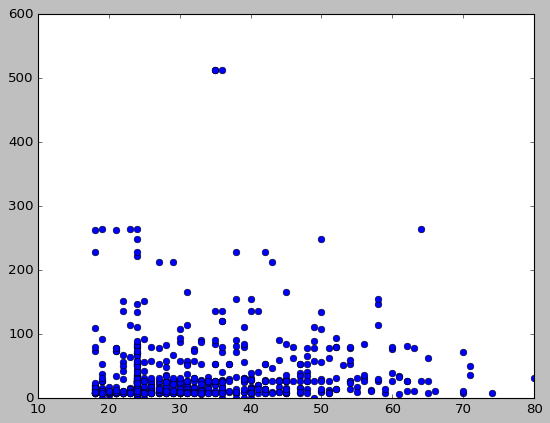

In [36]:
plt.style.use('classic')

plt.plot(titanic_personas['age'], titanic_personas['fare'], 'o')
plt.show();

In [0]:
import seaborn as sns
sns.set()

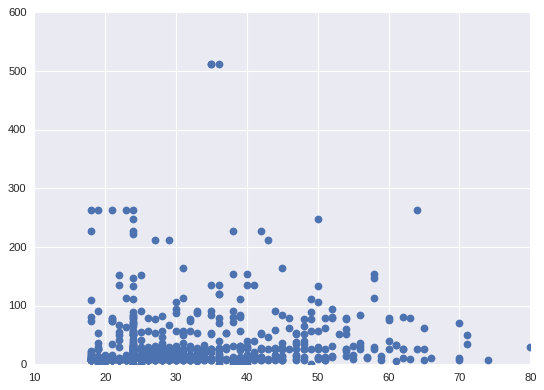

In [38]:
plt.plot(titanic_personas['age'], titanic_personas['fare'], 'o')
plt.show();

## Plotting distributions of variables

Histograms or density graphs can show the distribution of variables. Multiple variables can be placed on the same chart if it is meaningful to do so, and they have a similar range of values.

A histogram groups variable values into bins representing a range of value, then plots the membership size of the bins, either as absolute counts or as relative frequencies.

Seaborn can be used for KDE (kernel desity estimation) plots, which estimate the probability density function underlying the data distribution with a smooth curve. A `distplot` can also be used to show both the histogram bars and density estimate on the same chart. KDE plots can also be used for higher dimensional data, whether for joint distributions of for distributions of 2D and higher dimensional variables.

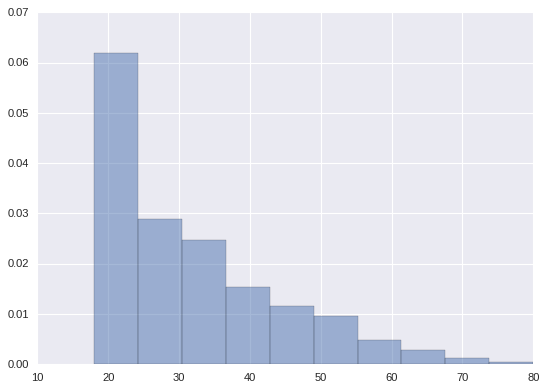

In [39]:
plt.hist(titanic_personas['age'], normed=True, alpha=0.5)
plt.show();

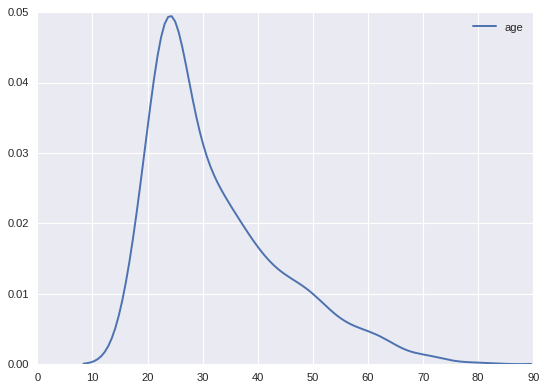

In [40]:
sns.kdeplot(titanic_personas['age']);

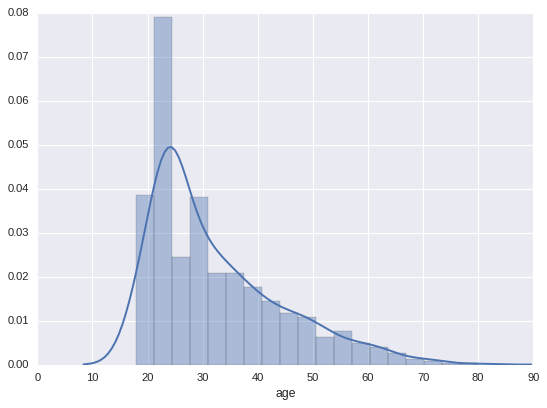

In [41]:
sns.distplot(titanic_personas['age']);

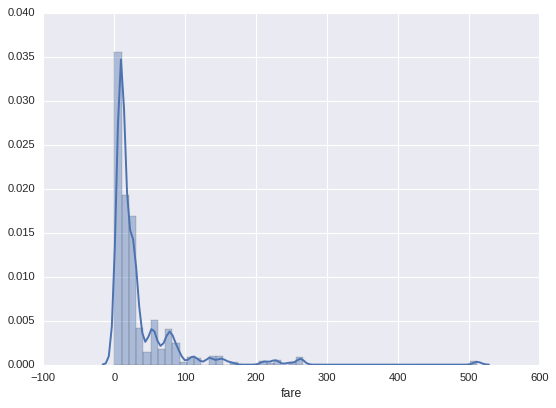

In [42]:
sns.distplot(titanic_personas['fare']);

(0, 55)

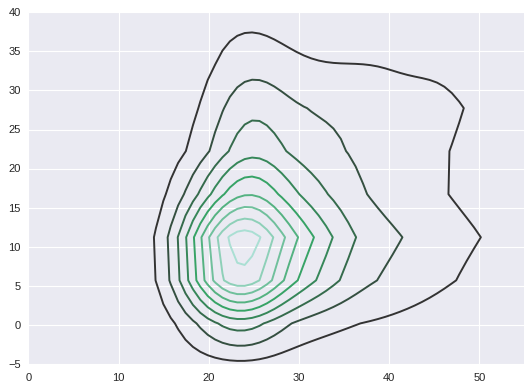

In [43]:
sns.kdeplot(titanic_personas[['age', 'fare']]);
plt.ylim(-5, 40)
plt.xlim(0, 55)

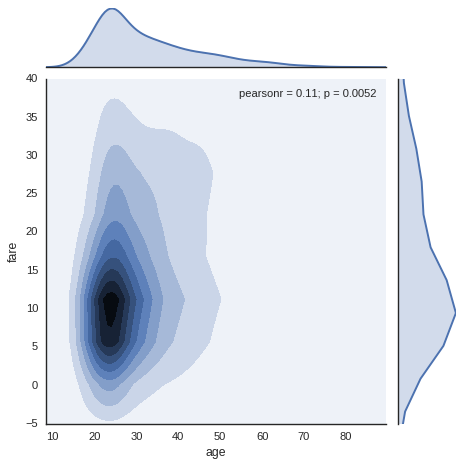

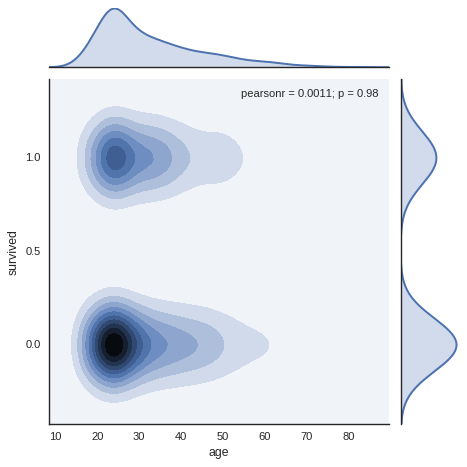

In [44]:
with sns.axes_style('white'):
    sns.jointplot("age", "fare", titanic_personas, kind='kde');
    plt.ylim(-5, 40)
    plt.show()
    sns.jointplot("age", "survived", titanic_personas, kind='kde')
    plt.show()

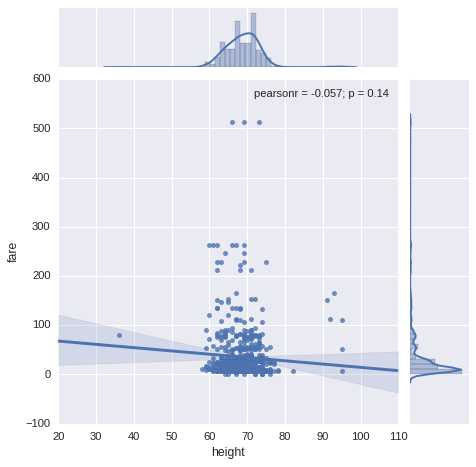

In [45]:
sns.jointplot("height", "fare", data=titanic_personas, kind='reg');

## Pair plots

When dealing with high dimensional data (as we are now), pair plots are a way to explore the relationships between all combinations of two variables.

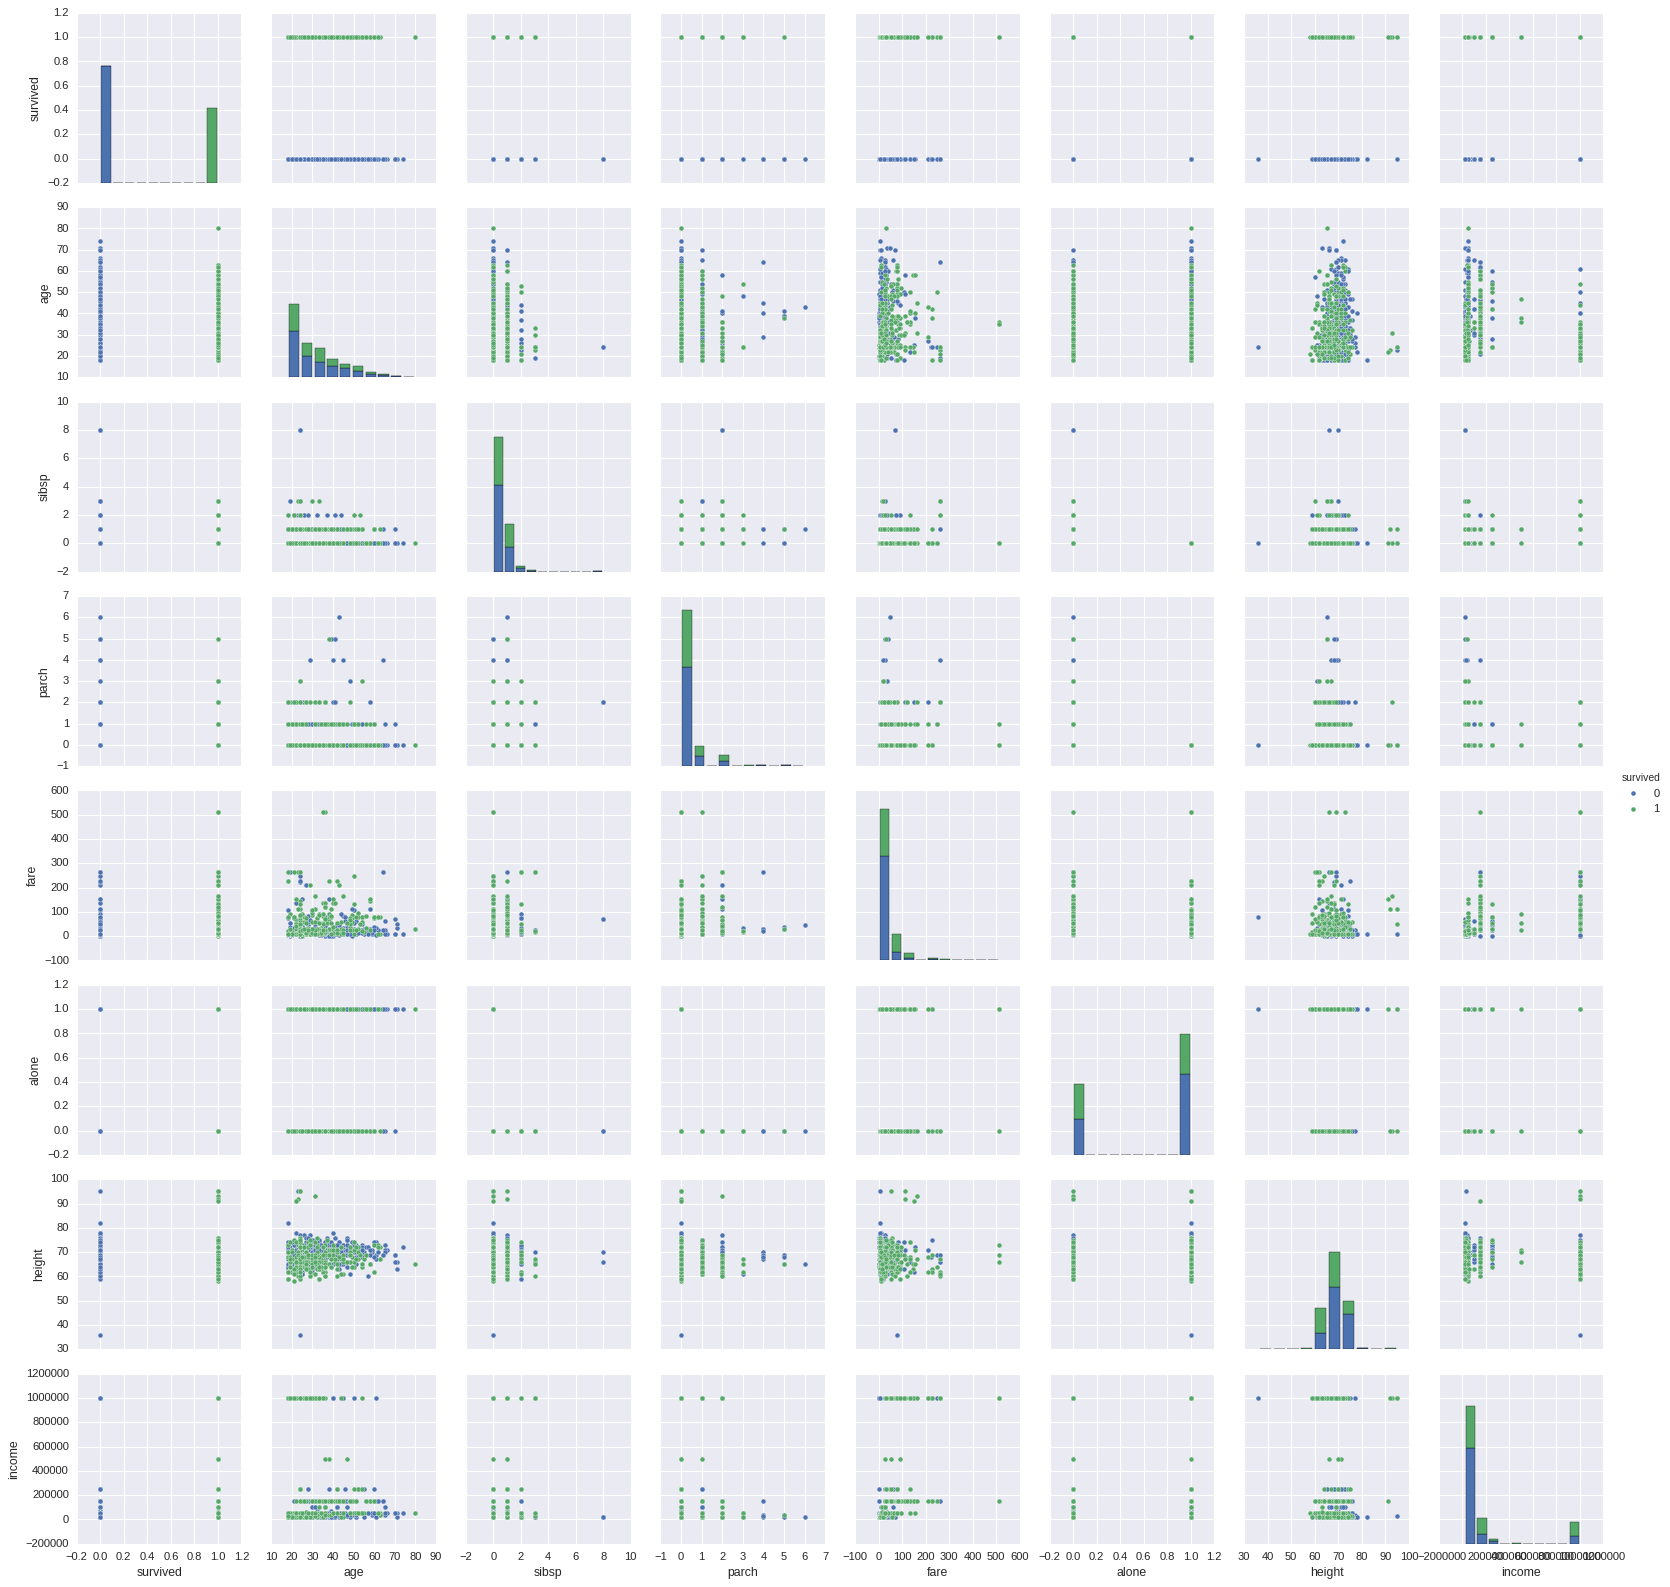

In [46]:
sns.pairplot(titanic_personas, hue='survived');

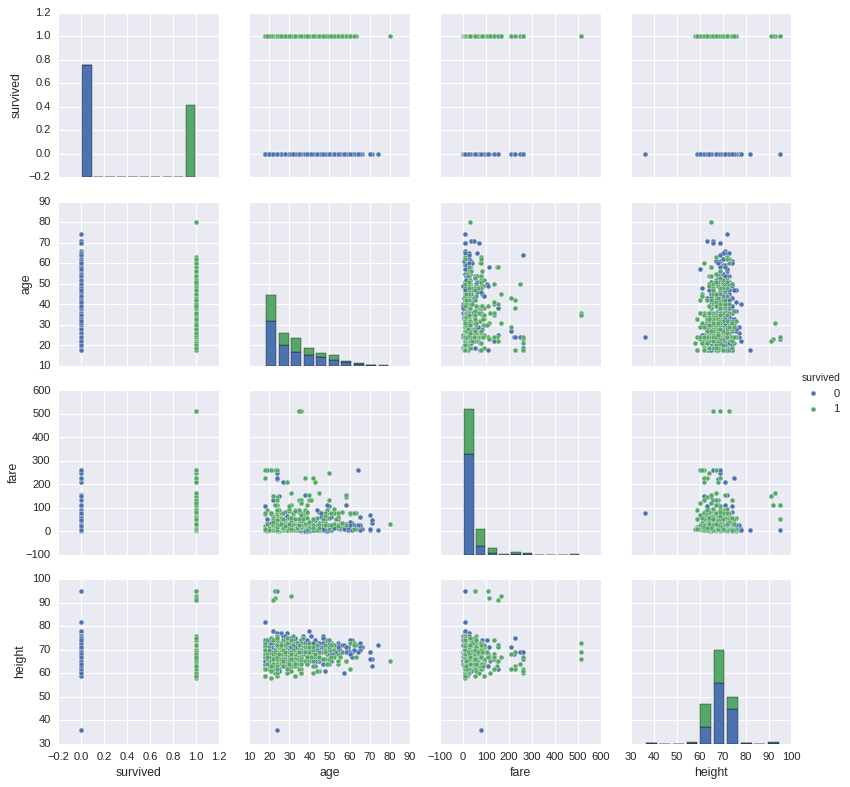

In [47]:
personas_features = titanic_personas[['survived', 'age', 'sex', 'fare', 'height']]
sns.pairplot(personas_features, hue='survived');

## Facet grids

By faceting, different combinations of subsets of a variables can be plotted side-by-side.

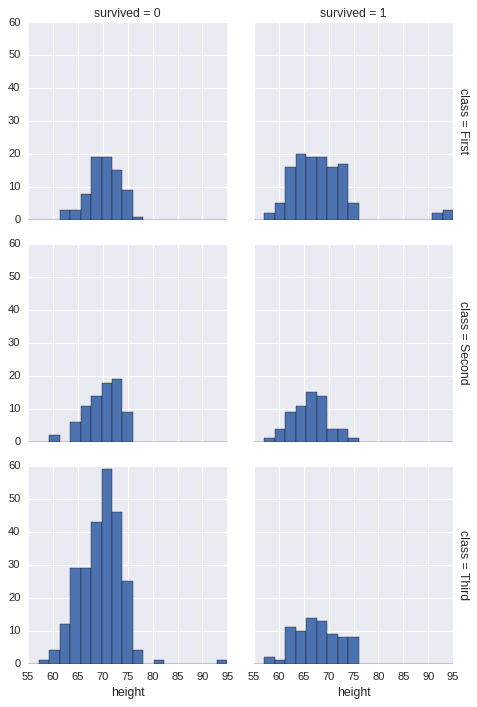

In [48]:
grid = sns.FacetGrid(titanic_personas, row='class', col='survived', margin_titles=True)
grid.map(plt.hist, 'height', bins=np.linspace(55, 95, 20));

## Factor plots

Box plots and violin plots allow for visualization of the distribution of variables within groupings defined by other variables.

Bar plots, like histograms, can display the distribution of variables, and can also handle distributions across categorical variables.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


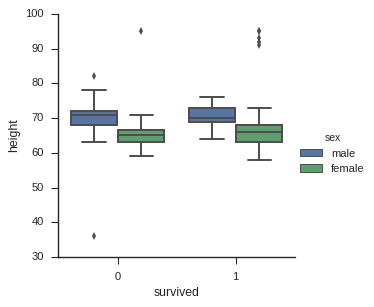

In [49]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("survived", "height", "sex", data=titanic_personas, kind="box")
    g.set_axis_labels("survived", "height");

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


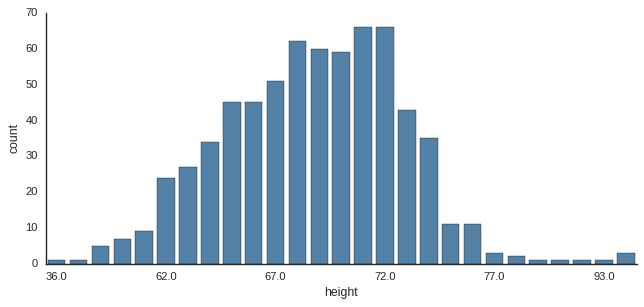

In [50]:
with sns.axes_style('white'):
    g = sns.factorplot("height", data=titanic_personas, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)